In [54]:
from math import *
from sympy.physics.vector import ReferenceFrame
from sympy.physics.vector import gradient
from mpl_toolkits.mplot3d import axes3d
import numpy as np
import mpmath as mp
mp.dps = 15; mp.pretty = True
import sympy as sp
import pandas as pd
from pandas import ExcelWriter
import matplotlib
import matplotlib.pyplot as plt
from brokenaxes import brokenaxes

# Testing with Global and UK methane emissions

In [55]:
# Import Data from the excel book
GlobalCH4Ems = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='Global Methane Emissions').rename(columns={"Unnamed: 0": "Year"})
GlobalCH4Ems['SLCP Emissions'] = GlobalCH4Ems['Energy'] + GlobalCH4Ems['Industrial'] + GlobalCH4Ems['Waste'] + GlobalCH4Ems['Other'] + GlobalCH4Ems['Agriculture']

UKCH4Ems = pd.read_excel (
    r'Graphs/GraphData.xlsx', 
    sheet_name='UK Methane Emissions').rename(columns={"Unnamed: 0": "Year"})
UKCH4Ems['SLCP Emissions'] = UKCH4Ems['Energy'] + UKCH4Ems['Industrial'] + UKCH4Ems['Waste'] + UKCH4Ems['Agriculture']

UKCH4Ems.head()

,Year,Energy,Industrial,Waste,Agriculture,SLCP Emissions
0,1500,0.42,0.000084,0.537,0.338,1.295084
1,1501,0.42,0.000084,0.537,0.338,1.295084
2,1502,0.42,0.000084,0.537,0.338,1.295084
3,1503,0.42,0.000084,0.537,0.338,1.295084
4,1504,0.42,0.000084,0.537,0.338,1.295084


In [56]:
# Calculate Metric Emissions
ReducedCO2feVectorMetric = CO2feVectorMetric[['YearInverted','CO2fe']]

GlobalCH4MetricEms = addMetricEmissions(GlobalCH4Ems,ReducedCO2feVectorMetric)
UKCH4MetricEms = addMetricEmissions(UKCH4Ems,ReducedCO2feVectorMetric)

UKCH4MetricEms.head()

,Year,Energy,Industrial,Waste,Agriculture,SLCP Emissions,BValue,CO2feEms,CO2we,Old-GWP*,CGWP,CGTP,GWP
0,1500,0.42,0.000084,0.537,0.338,1.295084,0.0,155.338333103233,145.04943,3626.23576,5568.86206,4791.81154,36.262358
1,1501,0.42,0.000084,0.537,0.338,1.295084,-0.0492833669489476,149.427060251966,145.04943,0.00000,0.00000,0.00000,36.262358
2,1502,0.42,0.000084,0.537,0.338,1.295084,-0.103561780863433,142.916658580041,145.04943,0.00000,0.00000,0.00000,36.262358
3,1503,0.42,0.000084,0.537,0.338,1.295084,-0.16080782136293,136.050306177663,145.04943,0.00000,0.00000,0.00000,36.262358
4,1504,0.42,0.000084,0.537,0.338,1.295084,-0.219435127954834,129.018278391116,145.04943,0.00000,0.00000,0.00000,36.262358


In [57]:
# Save in Excel Workbook
with ExcelWriter(r'Graphs/MetricEmissionsData.xlsx') as writer:  
    GlobalCH4Ems.to_excel(
    writer, sheet_name='Global Methane Metric Emissions')
    UKCH4Ems.to_excel( 
    writer, sheet_name='UK Methane Metric Emissions')

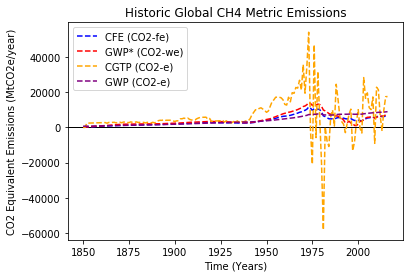

In [86]:
#Plot of UK CH4 Metric Emissions 1850 - 2017. Assuming const emissions pre 1850.
t = GlobalCH4MetricEms['Year'][350:517]
s = GlobalCH4MetricEms['CO2feEms'][350:517]
u = GlobalCH4MetricEms['CO2we'][350:517]
v = GlobalCH4MetricEms['Old-GWP*'][350:517]
w = GlobalCH4MetricEms['CGWP'][350:517]
x = GlobalCH4MetricEms['GWP'][350:517]
y = GlobalCH4MetricEms['CGTP'][350:517]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='CO2 Equivalent Emissions (MtCO2e/year)',
       title='Historic Global CH4 Metric Emissions')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])


plt.plot(t, s, '--', color="blue", label = 'CFE (CO2-fe)')
plt.plot(t, u, '--', color="red", label = 'GWP* (CO2-we)')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, y, '--', color="orange", label = 'CGTP (CO2-e)')
plt.plot(t, x, '--', color="purple", label = 'GWP (CO2-e)')

ax.legend()

plt.savefig('Graphs/Global CH4 Metric Emissions.png', dpi=500)

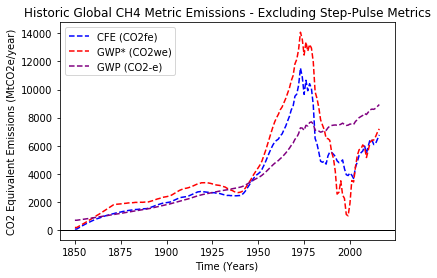

In [87]:
#Plot of UK CH4 Metric Emissions 1850 - 2017. Excluding Step-Pulse style metrics.
t = GlobalCH4MetricEms['Year'][350:517]
s = GlobalCH4MetricEms['CO2feEms'][350:517]
u = GlobalCH4MetricEms['CO2we'][350:517]
v = GlobalCH4MetricEms['Old-GWP*'][350:517]
w = GlobalCH4MetricEms['CGWP'][350:517]
x = GlobalCH4MetricEms['GWP'][350:517]
y = GlobalCH4MetricEms['CGTP'][350:517]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='CO2 Equivalent Emissions (MtCO2e/year)',
       title='Historic Global CH4 Metric Emissions - Excluding Step-Pulse Metrics')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, s, '--', color="blue", label = 'CFE (CO2fe)')
plt.plot(t, u, '--', color="red", label = 'GWP* (CO2we)')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
# plt.plot(t, y, '--', color="orange", label = 'CGTP')
plt.plot(t, x, '--', color="purple", label = 'GWP (CO2-e)')

ax.legend()

plt.savefig('Graphs/Global CH4 Metric Emissions - Excluding Step-Pulse Metrics.png', dpi=500)

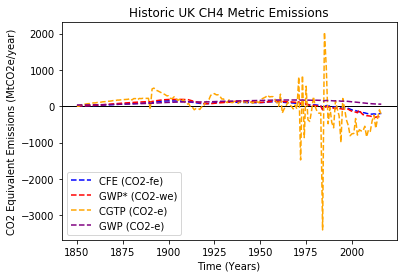

In [88]:
#Plot of UK CH4 Metric Emissions 1850 - 2017
t = UKCH4MetricEms['Year'][350:517]
s = UKCH4MetricEms['CO2feEms'][350:517]
u = UKCH4MetricEms['CO2we'][350:517]
v = UKCH4MetricEms['Old-GWP*'][350:517]
w = UKCH4MetricEms['CGWP'][350:517]
x = UKCH4MetricEms['GWP'][350:517]
y = UKCH4MetricEms['CGTP'][350:517]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='CO2 Equivalent Emissions (MtCO2e/year)',
       title='Historic UK CH4 Metric Emissions')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, s, '--', color="blue", label = 'CFE (CO2-fe)')
plt.plot(t, u, '--', color="red", label = 'GWP* (CO2-we)')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
plt.plot(t, y, '--', color="orange", label = 'CGTP (CO2-e)')
plt.plot(t, x, '--', color="purple", label = 'GWP (CO2-e)')

ax.legend()

plt.savefig('Graphs/UK CH4 Metric Emissions.png', dpi=500)

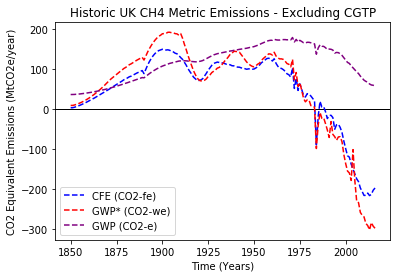

In [89]:
#Plot of UK CH4 Metric Emissions 1850 - 2017. Excluding Step-Pulse style metrics.
t = UKCH4MetricEms['Year'][350:517]
s = UKCH4MetricEms['CO2feEms'][350:517]
u = UKCH4MetricEms['CO2we'][350:517]
v = UKCH4MetricEms['Old-GWP*'][350:517]
w = UKCH4MetricEms['CGWP'][350:517]
x = UKCH4MetricEms['GWP'][350:517]
y = UKCH4MetricEms['CGTP'][350:517]

fig, (ax) = plt.subplots()
ax.axhline(linewidth=1,color='black')


ax.set(xlabel='Time (Years)', ylabel='CO2 Equivalent Emissions (MtCO2e/year)',
       title='Historic UK CH4 Metric Emissions - Excluding CGTP')
# ax.grid()

# red_patch = mpatches.Patch(color='red', label='Agriculture')
# plt.legend(handles=[red_patch])

plt.plot(t, s, '--', color="blue", label = 'CFE (CO2-fe)')
plt.plot(t, u, '--', color="red", label = 'GWP* (CO2-we)')
plt.plot(t, x, '--', color="purple", label = 'GWP (CO2-e)')
# plt.plot(t, v, '--', color="green", label = 'OldGWP*')
# plt.plot(t, w, '--', color="orange", label = 'CGWP')
# plt.plot(t, y, '--', color="orange", label = 'CGTP')

ax.legend()

plt.savefig('Graphs/UK CH4 Metric Emissions - Excluding CGTP.png', dpi=500)

# UK Agriculture Example Calculation

In [62]:
UKAgriCH4Ems = UKCH4Ems[['Agriculture','Year']]

UKAgriCH4Ems = UKAgriCH4Ems.rename(columns={"Agriculture": "SLCP Emissions"})

In [63]:
UKAgriCH4MetricEms = addMetricEmissions(UKAgriCH4Ems,ReducedCO2feVectorMetric)


# CH4 Step-Change Emissions Example

In [64]:
TimePeriod = 200 #Years
SLCPEmissions = np.ones(TimePeriod).tolist()
SLCPEmissions[0:49]=np.zeros(50).tolist()
Years = np.arange(-50,TimePeriod-49).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP Emissions':SLCPEmissions})

# CO2fe Calculator Constants
StepTestEmissionsOutput = addMetricEmissions(SLCPTimeSeries,ReducedCO2feVectorMetric)



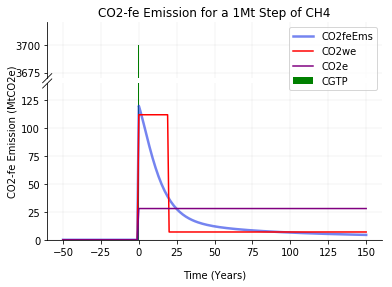

In [65]:
t = StepTestEmissionsOutput['Year']
s = StepTestEmissionsOutput['CO2feEms']
u = StepTestEmissionsOutput['CO2we']
v = StepTestEmissionsOutput['CGTP']
x = StepTestEmissionsOutput['GWP']

fig = plt.figure()
bax = brokenaxes(ylims=((0, 140), (3670, 3720)), hspace=.05)
bax.plot(t, s, color = (0.1, 0.2, 0.9, 0.6), linewidth = 2.5)
bax.plot(t, u, color = "red", label='CO2we')
bax.bar(t, v, color = "green", label='CGTP')
bax.plot(t, x, color = "purple", label='CO2e')


bax.set_xlabel('Time (Years)')
bax.set_ylabel('CO2-fe Emission (MtCO2e)')
bax.set_title('CO2-fe Emission for a 1Mt Step of CH4')
bax.axhline(linewidth=1,color='black')
# bax.axvline(linewidth=1,color='black')

bax.grid(color=(0, 0, 0, 0.3), linestyle='-', linewidth=0.05)
bax.legend()

plt.show()

In [66]:
# Export Data

with ExcelWriter(r'Graphs/StepCH4Data.xlsx') as writer:  
    StepTestEmissionsOutput.to_excel(
    writer, sheet_name='CO2-equivalent-emissions')

# RCP Metric Calculations

In [67]:
# Import Data from the excel book
# Load multigas RCP emissions data from excel
RCP26Ems = pd.read_excel (
    r'RCP Data/RCP3PD_EMISSIONS.xls', 
    sheet_name='Emissions')[['Year','CO2','CH4','N2O']]
RCP26Ems['SLCP Emissions'] = RCP26Ems['CH4']

RCP45Ems = pd.read_excel (
    r'RCP Data/RCP45_EMISSIONS.xls', 
    sheet_name='Emissions')[['Year','CO2','CH4','N2O']]
RCP45Ems['SLCP Emissions'] = RCP45Ems['CH4']

RCP60Ems = pd.read_excel (
    r'RCP Data/RCP6_EMISSIONS.xls', 
    sheet_name='Emissions')[['Year','CO2','CH4','N2O']]
RCP60Ems['SLCP Emissions'] = RCP60Ems['CH4']

RCP85Ems = pd.read_excel (
    r'RCP Data/RCP85_EMISSIONS.xls', 
    sheet_name='Emissions')[['Year','CO2','CH4','N2O']]
RCP85Ems['SLCP Emissions'] = RCP85Ems['CH4']

In [68]:
# Calculate Metric Emissions
ReducedCO2feVectorMetric = CO2feVectorMetric[['YearInverted','CO2fe']]

RCP26MetricEms = addMetricEmissions(RCP26Ems,ReducedCO2feVectorMetric)
RCP45MetricEms = addMetricEmissions(RCP45Ems,ReducedCO2feVectorMetric)
RCP60MetricEms = addMetricEmissions(RCP60Ems,ReducedCO2feVectorMetric)
RCP85MetricEms = addMetricEmissions(RCP85Ems,ReducedCO2feVectorMetric)

In [69]:
# Save in Excel Workbook
with ExcelWriter(r'RCP Data/RCPMetricData.xlsx') as writer:  
    RCP26MetricEms.to_excel(
    writer, sheet_name='RCP 26 Metric Emissions')
    RCP45MetricEms.to_excel( 
    writer, sheet_name='RCP 45 Metric Emissions')
    RCP60MetricEms.to_excel( 
    writer, sheet_name='RCP 60 Metric Emissions')
    RCP85MetricEms.to_excel( 
    writer, sheet_name='RCP 85 Metric Emissions')

# Equivalent Emissions Calculator

This calculator takes a timeseries of historic SLCP emissions and calculates the CO2-fe emission of a new SLCP emission based on this.

One thing to bear in mind is that a zero SCLP emission in the current year is equivalent to negative CO2 emissions. Therefore this value cannot simply be multiplied for larger/smaller emissions but has a (slightly) more complex dependence.

i.e. CO2feEmissions(t) = REch4/REco2*(EmissionSLCP(t) - B) for a given historic timeseries of SLCP emissions. Where B is defined by the historic timeseries: B = int E(t)*VM(t) from t = -1 to -infinity

In [70]:
# ReducedCO2feVectorMetric = CO2feVectorMetric[['YearInverted','CO2fe']]

# # Test Emissions Timeseries
# TimePeriod = 100 #Years
# SLCPEmissions = np.ones(TimePeriod).tolist()
# Years = np.arange(1900,1900+TimePeriod).tolist()

# EmissionsSeries = pd.DataFrame(data = {'Year':Years,'SLCP Emissions':SLCPEmissions})

# addMetricEmissions(EmissionsSeries,ReducedCO2feVectorMetric).tail()

# # N.B. Still need to extend the Vector Metric.


In [71]:
def addMetricEmissions(slcpEmissionsSeries,VectorMetric):
    
# #   Key to Metric Constants
    
    slcpEmissionsSeries=addCO2feEmsColumn(VectorMetric, slcpEmissionsSeries)
    slcpEmissionsSeries=addCO2weEmsColumn(slcpEmissionsSeries)
    slcpEmissionsSeries=addOldGWPstarEmsColumn(slcpEmissionsSeries)
    slcpEmissionsSeries=addCGWPEmsColumn(slcpEmissionsSeries)
    slcpEmissionsSeries=addCGTPEmsColumn(slcpEmissionsSeries)
    slcpEmissionsSeries=addGWPEmsColumn(slcpEmissionsSeries)
    
#     Remove unnecessary columns
    slcpEmissionsSeries = slcpEmissionsSeries.drop(['NormalisedYear', 'MultipliedEmissions'], axis=1)
    return slcpEmissionsSeries
    

## Metric Constants

In [72]:
# Combine all the metric constants into a single object to make them easier to keep track of

MetricConstants = pd.DataFrame({
    'GWP100': [28], 
    'H': [100], 
    'CGWP100': [4300], 
    'CGTP75': [3700], 
    'r': [0.75], 
    's': [0.25], 
    'dt': [20],
    'REch4':[0.000599],       #W/m2ppb AR5 Chapt.8 Appendix 8.A. 1.65 * 0.000363
    'REco2':[0.0000137],      #W/m2ppb AR5 Chapt.8 Appendix 8.A.
    'Convch4':[0.351828],  #ppb/MtCH4 GIR
    'Convco2':[0.1282496]   #ppb/MtCO2 [0.46895] #ppb/MtC GIR - where does this come from?
})

## GWP Column Generation Function

In [73]:
def addGWPEmsColumn(slcpEmissionsSeries):
    
    slcpEmissionsSeries["GWP"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()

    GWP100 = MetricConstants['GWP100'][0]
    
    for i in slcpEmissionsSeries.index:
        Et = slcpEmissionsSeries["SLCP Emissions"].loc[i]
        slcpEmissionsSeries["GWP"].loc[i] = GWP100*Et

    return slcpEmissionsSeries

## CGWP Column Generation Function

In [74]:
def addCGWPEmsColumn(slcpEmissionsSeries):
    
    slcpEmissionsSeries["CGWP"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()

    CGWP100 = MetricConstants['CGWP100'][0]
    
    for i in slcpEmissionsSeries.index:
        Et = slcpEmissionsSeries["SLCP Emissions"].loc[i]
        
        if i == 0:
            Etdt = 0
            slcpEmissionsSeries["CGWP"].loc[i] = (CGWP100*(Et-Etdt))
        else:
            Etdt = slcpEmissionsSeries["SLCP Emissions"].loc[i-1]
            slcpEmissionsSeries["CGWP"].loc[i] = (CGWP100*(Et-Etdt))
    
    return slcpEmissionsSeries

## CGTP Column Generation Function

In [75]:
def addCGTPEmsColumn(slcpEmissionsSeries):
    
    slcpEmissionsSeries["CGTP"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()

    CGTP75 = MetricConstants['CGTP75'][0]
    
    for i in slcpEmissionsSeries.index:
        Et = slcpEmissionsSeries["SLCP Emissions"].loc[i]
        
        if i == 0:
            Etdt = 0
            slcpEmissionsSeries["CGTP"].loc[i] = (CGTP75*(Et-Etdt))
        else:
            Etdt = slcpEmissionsSeries["SLCP Emissions"].loc[i-1]
            slcpEmissionsSeries["CGTP"].loc[i] = (CGTP75*(Et-Etdt))
    
    return slcpEmissionsSeries

## Old-GWP* Column Generation Function

In [76]:
def addOldGWPstarEmsColumn(slcpEmissionsSeries):
    
    slcpEmissionsSeries["Old-GWP*"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()
    
    #GWP* constants:
    H = MetricConstants['H'][0]
    GWP100 = MetricConstants['GWP100'][0]

    
    for i in slcpEmissionsSeries.index:
        Et = slcpEmissionsSeries["SLCP Emissions"].loc[i]
        
        if i == 0:
            Etdt = 0
            slcpEmissionsSeries["Old-GWP*"].loc[i] = (GWP100*(Et-Etdt)*H)
        else:
            Etdt = slcpEmissionsSeries["SLCP Emissions"].loc[i-1]
            slcpEmissionsSeries["Old-GWP*"].loc[i] = (GWP100*(Et-Etdt)*H)
    
    return slcpEmissionsSeries

##  CO2we Column Generation Function

In [77]:
def addCO2weEmsColumn(slcpEmissionsSeries):
    
    slcpEmissionsSeries["CO2we"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()
    
    #CO2we constants:
    r = MetricConstants['r'][0]
    s = MetricConstants['s'][0]
    H = MetricConstants['H'][0]
    GWP100 = MetricConstants['GWP100'][0]
    dt = MetricConstants['dt'][0]
    
    for i in slcpEmissionsSeries.index:
        Et = slcpEmissionsSeries["SLCP Emissions"].loc[i]
        
        if i > 19:
            Etdt = slcpEmissionsSeries["SLCP Emissions"].loc[i-int(dt)]
            slcpEmissionsSeries["CO2we"].loc[i] = GWP100 * ((r*(Et-Etdt)*H)/dt + s*Et)
        elif i < 20:
            slcpEmissionsSeries["CO2we"].loc[i] = GWP100 * ((r*Et*H)/dt + s*Et)
    
    return slcpEmissionsSeries

## CO2fe Column Generation Functions

In [78]:
# Add the "CO2feEms" column, Gamma is the ratio of radiative efficiencies

def addCO2feEmsColumn(VectorMetric, slcpEmissionsSeries):
    
    REch4 = MetricConstants['REch4'][0]
    REco2 = MetricConstants['REco2'][0]
    Convch4 = MetricConstants['Convch4'][0]
    Convco2 = MetricConstants['Convco2'][0]
    
    Gamma = (Convch4*REch4)/(Convco2*REco2)
    
    slcpEmissionsSeries = addBValueColumn(VectorMetric, slcpEmissionsSeries)
    
    slcpEmissionsSeries["CO2feEms"] = Gamma * (slcpEmissionsSeries["SLCP Emissions"] + slcpEmissionsSeries["BValue"])
    
    return slcpEmissionsSeries

In [79]:
# Add B value column and insert the b value for each year

def addBValueColumn(VectorMetric, slcpEmissionsSeries):
    
    slcpEmissionsSeries["BValue"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()
    
    for i in slcpEmissionsSeries.index:
        slcpEmissionsSeries["BValue"].loc[i] = generateBValue(VectorMetric, slcpEmissionsSeries, slcpEmissionsSeries["Year"].loc[i])
        
    return slcpEmissionsSeries
        


In [80]:
# Generate B value
    
def generateBValue(VectorMetric, slcpEmissionsSeries, YearSpecified):
#   slcpEmissionsSeries takes the form of a dataframe with columns "Year" and "SLCP Emissions"

#   Create a "NormalisedYear" column
    slcpEmissionsSeries["NormalisedYear"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()
    slcpEmissionsSeries["NormalisedYear"] = slcpEmissionsSeries["Year"] - YearSpecified
#   Create a new column for the MultipliedEmissions
    slcpEmissionsSeries["MultipliedEmissions"] = np.zeros(len(slcpEmissionsSeries.index)).tolist()
    
#   Match indexes
    slcpEmissionsSeries = slcpEmissionsSeries.set_index('NormalisedYear')
    VectorMetric = VectorMetric.set_index('YearInverted')
    
#   Calculate the MultipliedEmissions
    MultipliedEmissions = slcpEmissionsSeries["SLCP Emissions"].mul(VectorMetric["CO2fe"],fill_value=0)
    slcpEmissionsSeries["MultipliedEmissions"] = MultipliedEmissions 
    
    Total = sum(slcpEmissionsSeries["MultipliedEmissions"])-slcpEmissionsSeries["MultipliedEmissions"].loc[0]
   
    slcpEmissionsSeries.reset_index
    VectorMetric.reset_index
    
#   Sum the Values in the "MultipliedEmissions" column to get to the CO2-fe emission for that year.
    return Total    




# Forcing Equivalent Emissions - Making the Vector

Aim is to take an SLCP emissions timeseries and output a CO2-equivalent timeseries for these metrics:

GWP100
Old-GWP*
CGWP
GWP*
CO2 FE

## Making the CFE Vector Metric

In [81]:
# Test Emissions Timeseries
TimePeriod = 300 #Years
SLCPEmissions = np.zeros(TimePeriod).tolist()
SLCPEmissions[0] = 1
Years = np.arange(0,TimePeriod).tolist()

SLCPTimeSeries = pd.DataFrame(data = {'Year':Years,'SLCP':SLCPEmissions})

# CO2fe Calculator Constants

# CARBON
CarbonBoxes = np.array([0.2173,0.2240,0.2824,0.2763])
CarbonLifetimes = np.array([1000000,394.4,36.54,4.304])

# METHANE
MethaneBoxes = np.array([1,0,0,0])
MethaneLifetimes = np.array([9.15,1,1,1])
StepDownPercentage = 0

# CO2we Calculator Constants
dt = 20
H = 100
GWPH = 28
r = 0.75
s = 0.25

DecayConstants = pd.DataFrame(data = {'CarbonBoxes':CarbonBoxes,'CarbonLifetimes':CarbonLifetimes,'MethaneLifeBoxes':MethaneBoxes,'MethaneLifetimes':MethaneLifetimes})

PulseTestEmissionsOutput = CalculateCO2ForcingEquivalent(SLCPTimeSeries)

In [82]:
#Generating a vector-metric for CO2-fe

CO2feVectorMetric = PulseTestEmissionsOutput
CO2feVectorMetric['CO2feInverted']=CO2feVectorMetric['CO2fe']
CO2feVectorMetric['YearInverted']=CO2feVectorMetric['Year']
for i in CO2feVectorMetric.index:
    CO2feVectorMetric['CO2feInverted'][i]= CO2feVectorMetric['CO2fe'][len(CO2feVectorMetric['CO2fe'])-i-1]
    CO2feVectorMetric['YearInverted'][i]= -CO2feVectorMetric['Year'][i]

/Users/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys
/Users/student/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


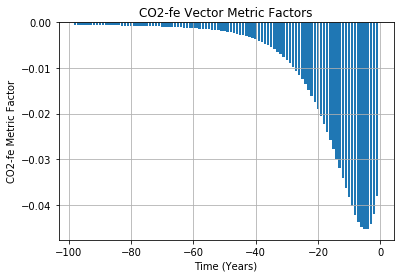

In [83]:
# Plot the metric
t = CO2feVectorMetric['YearInverted'][1:99]
s = PulseTestEmissionsOutput['CO2fe'][1:99]


fig, (ax) = plt.subplots()
ax.bar(t, s)


ax.set(xlabel='Time (Years)', ylabel='CO2-fe Metric Factor',
       title='CO2-fe Vector Metric Factors')
ax.grid()

plt.savefig('Graphs/CO2fe Vector Metric Factors.png', dpi=500)

In [84]:
PulseTestEmissionsOutput['CO2fe'][1]

mpf('-0.03805417975831038')

# CO2-fe and CO2-we Emissions Calculator

In [85]:
# CO2fe and CO2we Emissions Calculator

def Dco2(k,t):
    Dco2 = CarbonBoxes[k]*exp(-t/(CarbonLifetimes[k]))
    return Dco2
    
def Dch4(k,t):
    Dch4 = MethaneBoxes[k]*exp(-t/(MethaneLifetimes[k]))
    if t < 20:
        return Dch4
    else:
        return (1-StepDownPercentage)*Dch4

def CalculateCO2ForcingEquivalent(SLCPTimeSeries):
    
    CO2feTimeSeries = SLCPTimeSeries
    
#   Create the output DataFrame and add Columns for CO2fe(t) and CO2we(t) emissions and R(t) and S(t) intermediaries.
    CO2feTimeSeries = SLCPTimeSeries
    BlankEmissions = np.zeros(len(SLCPTimeSeries))
    FourColumnBlankEmissions = pd.DataFrame(np.array([BlankEmissions,BlankEmissions,BlankEmissions,BlankEmissions]).transpose())
    CO2feTimeSeries['CO2fe'] = BlankEmissions
    CO2feTimeSeries['CO2we'] = BlankEmissions
    
#   Make R and S dataframes
    R = pd.concat([SLCPTimeSeries[{'Year','SLCP'}],pd.DataFrame(FourColumnBlankEmissions)], axis=1)
    R['Total'] = BlankEmissions
    S = pd.concat([SLCPTimeSeries[{'Year','SLCP'}],pd.DataFrame(FourColumnBlankEmissions)], axis=1)
    S['Total'] = BlankEmissions

#   Compute the CO2fe values for each year
    for i in CO2feTimeSeries.index:
        
        for k in DecayConstants.index:
#           Compute S(i) and enter that value for the current i (Year)
            S.loc[i,k] = mp.nsum(lambda j: CO2feTimeSeries.loc[int(j),'SLCP']*Dch4(k,i-j), [0,i])

#           Compute R(i) given S(i) and existing values of R(i)
            R.loc[i,k] = mp.nsum(lambda j: (S.loc[int(j),'Total']-R.loc[int(j),'Total'])*Dco2(k,i-j), [0,i-1])
    
        S.loc[i,'Total'] = mp.nsum(lambda k: S.loc[i,k], [0,len(DecayConstants.index)-1])
        R.loc[i,'Total'] = mp.nsum(lambda k: R.loc[i,k], [0,len(DecayConstants.index)-1])

#       Compute CO2fe(i) from these values of S(i) and R(i)
        CO2feTimeSeries.loc[i,'CO2fe'] = (S.loc[i,'Total'] - R.loc[i,'Total'])
        
#       Compute CO2we
        Et = CO2feTimeSeries.loc[i,'SLCP']
        EtMinusdt = 0
        if i > 19:
            EtMinusdt = CO2feTimeSeries.loc[int(i-20),'SLCP']
        CO2feTimeSeries.loc[i,'CO2we'] = GWPH*((r*H)/dt*(Et - EtMinusdt) + s*Et)
   
    return CO2feTimeSeries